<a href="https://colab.research.google.com/github/psy-phy-org/NLP/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# word cloud
文章中で出現頻度が高い単語を複数選び出し、その頻度に応じた大きさで図示する手法。<br>ウェブページやブログなどに頻出する単語を自動的に並べることなどを指す。<br>文字の大きさだけでなく、色、字体、向きに変化をつけることで、文章の内容をひと目で印象づけることができる。

デジタル大辞泉「ワードクラウド」の解説 <https://kotobank.jp/word/ワードクラウド-674221> (reference:2022/09/24)

In [ ]:
!pip install janome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.7 MB 1.2 MB/s 


In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,432 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 157604 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-g

In [ ]:
import re
import zipfile
import urllib.request
import os.path,glob
 
# 「坊ちゃん」夏目漱石 （青空文庫からダウンロードしたいURLを入力する）
URL = 'https://www.aozora.gr.jp/cards/000148/files/752_ruby_2438.zip'

In [ ]:
def main():
    download_text = download(URL)
    text = convert(download_text)
    print(text)
    with open('result.txt', 'w') as f:
         f.write(text)
 
def convert(download_text):
    binarydata = open(download_text, 'rb').read()
    text = binarydata.decode('shift_jis')
 
    # ルビ、注釈などの除去
    text = re.split(r'\-{5,}', text)[2]
    text = re.split(r'底本：', text)[0]
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = text.strip()
    return text
 
def download(url):
 # データファイルをダウンロードする
 zip_file = re.split(r'/', url)[-1]
 
 if not os.path.exists(zip_file):
     print('Download URL')
     print('URL:',url)
     urllib.request.urlretrieve(url, zip_file)
 else:
     print('Download File exists')
 
 # フォルダの生成
 dir, ext = os.path.splitext(zip_file)
 if not os.path.exists(dir):
     os.makedirs(dir)
 
 # zipファイルの展開
 zip_obj = zipfile.ZipFile(zip_file, 'r')
 zip_obj.extractall(dir)
 zip_obj.close()
 
 # zipファイルの削除
 os.remove(zip_file)
 
 # テキストファイルの抽出
 path = os.path.join(dir,'*.txt')
 list = glob.glob(path)
 return list[0]
 
if __name__ == "__main__":
    main()

Download URL
URL: https://www.aozora.gr.jp/cards/000148/files/752_ruby_2438.zip
一

　親譲りの無鉄砲で小供の時から損ばかりしている。小学校に居る時分学校の二階から飛び降りて一週間ほど腰を抜かした事がある。なぜそんな無闇をしたと聞く人があるかも知れぬ。別段深い理由でもない。新築の二階から首を出していたら、同級生の一人が冗談に、いくら威張っても、そこから飛び降りる事は出来まい。弱虫やーい。と囃したからである。小使に負ぶさって帰って来た時、おやじが大きな眼をして二階ぐらいから飛び降りて腰を抜かす奴があるかと云ったから、この次は抜かさずに飛んで見せますと答えた。
　親類のものから西洋製のナイフを貰って奇麗な刃を日に翳して、友達に見せていたら、一人が光る事は光るが切れそうもないと云った。切れぬ事があるか、何でも切ってみせると受け合った。そんなら君の指を切ってみろと注文したから、何だ指ぐらいこの通りだと右の手の親指の甲をはすに切り込んだ。幸ナイフが小さいのと、親指の骨が堅かったので、今だに親指は手に付いている。しかし創痕は死ぬまで消えぬ。
　庭を東へ二十歩に行き尽すと、南上がりにいささかばかりの菜園があって、真中に栗の木が一本立っている。これは命より大事な栗だ。実の熟する時分は起き抜けに背戸を出て落ちた奴を拾ってきて、学校で食う。菜園の西側が山城屋という質屋の庭続きで、この質屋に勘太郎という十三四の倅が居た。勘太郎は無論弱虫である。弱虫の癖に四つ目垣を乗りこえて、栗を盗みにくる。ある日の夕方｜折戸の蔭に隠れて、とうとう勘太郎を捕まえてやった。その時勘太郎は逃げ路を失って、一生懸命に飛びかかってきた。向うは二つばかり年上である。弱虫だが力は強い。鉢の開いた頭を、こっちの胸へ宛ててぐいぐい押した拍子に、勘太郎の頭がすべって、おれの袷の袖の中にはいった。邪魔になって手が使えぬから、無暗に手を振ったら、袖の中にある勘太郎の頭が、右左へぐらぐら靡いた。しまいに苦しがって袖の中から、おれの二の腕へ食い付いた。痛かったから勘太郎を垣根へ押しつけておいて、足搦をかけて向うへ倒してやった。山城屋の地面は菜園より六尺がた低い。勘太郎は四つ目垣を半分｜崩して、自分の領分へ真逆様に落ちて、ぐうと云った。勘太郎が落ちるとき

一　親譲りの無鉄砲で小供の時から損ばかりしている。小学校に居る時分学校の二階から飛び降りて一週間ほど腰を抜かした事がある。なぜそんな無闇をしたと聞く人があるかも知れぬ。別段深い理由でもない。新築の二階から首を出していたら、同級生の一人が冗談に、いくら威張っても、そこから飛び降りる事は出来まい。弱虫やーい。と囃したからである。小使に負ぶさって帰って来た時、おやじが大きな眼をして二階ぐらいから飛び降りて腰を抜かす奴があるかと云ったから、この次は抜かさずに飛んで見せますと答えた。　親類のものから西洋製のナイフを貰って奇麗な刃を日に翳して、友達に見せていたら、一人が光る事は光るが切れそうもないと云った。切れぬ事があるか、何でも切ってみせると受け合った。そんなら君の指を切ってみろと注文したから、何だ指ぐらいこの通りだと右の手の親指の甲をはすに切り込んだ。幸ナイフが小さいのと、親指の骨が堅かったので、今だに親指は手に付いている。しかし創痕は死ぬまで消えぬ。　庭を東へ二十歩に行き尽すと、南上がりにいささかばかりの菜園があって、真中に栗の木が一本立っている。これは命より大事な栗だ。実の熟する時分は起き抜けに背戸を出て落ちた奴を拾ってきて、学校で食う。菜園の西側が山城屋という質屋の庭続きで、この質屋に勘太郎という十三四の倅が居た。勘太郎は無論弱虫である。弱虫の癖に四つ目垣を乗りこえて、栗を盗みにくる。ある日の夕方｜折戸の蔭に隠れて、とうとう勘太郎を捕まえてやった。その時勘太郎は逃げ路を失って、一生懸命に飛びかかってきた。向うは二つばかり年上である。弱虫だが力は強い。鉢の開いた頭を、こっちの胸へ宛ててぐいぐい押した拍子に、勘太郎の頭がすべって、おれの袷の袖の中にはいった。邪魔になって手が使えぬから、無暗に手を振ったら、袖の中にある勘太郎の頭が、右左へぐらぐら靡いた。しまいに苦しがって袖の中から、おれの二の腕へ食い付いた。痛かったから勘太郎を垣根へ押しつけておいて、足搦をかけて向うへ倒してやった。山城屋の地面は菜園より六尺がた低い。勘太郎は四つ目垣を半分｜崩して、自分の領分へ真逆様に落ちて、ぐうと云った。勘太郎が落ちるときに、おれの袷の片袖がもげて、急に手が自由になった。その晩母が山城屋に詫びに行ったついでに袷の片袖も取り返して来た。　この外いたずらは大分やった。大工の兼公と肴屋の角をつ

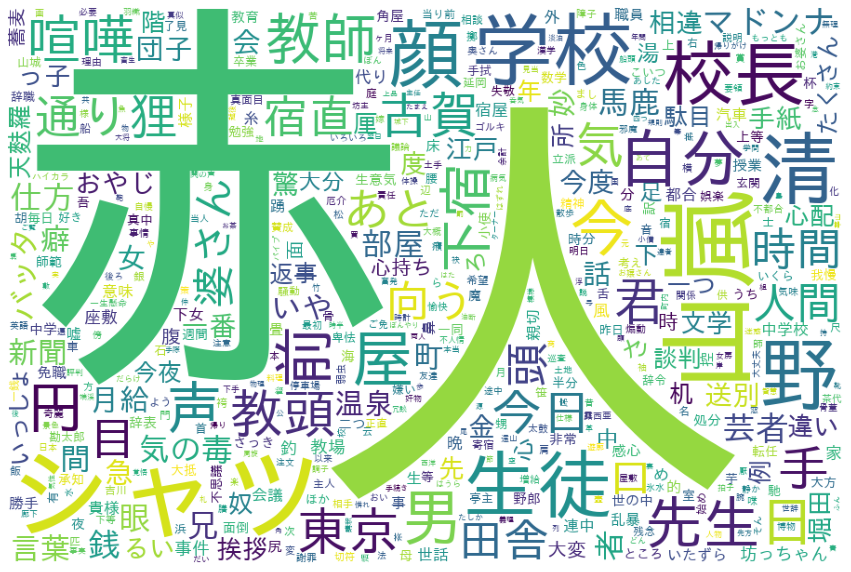

In [ ]:

from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
 
text_file = open("result.txt")
full_text = text_file.read()
full_text= full_text.replace("\n","")
 
print(full_text)  
t = Tokenizer()
tokens = t.tokenize(full_text)
 
 
word_list=[]
for token in tokens:
    word = token.surface
    partOfSpeech = token.part_of_speech.split(',')[0]
    partOfSpeech2 = token.part_of_speech.split(',')[1]
     
    if partOfSpeech == "名詞":
        if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
            word_list.append(word)
 
words_wakati=" ".join(word_list)
print(words_wakati)  
 
stop_words = ['さん','そう']  
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'  # 日本語フォント指定
 
wordcloud = WordCloud(
    font_path=fpath,
    width=900, height=600,   # default width=400, height=200
    background_color="white",   # default=”black”
    stopwords=set(stop_words),
    max_words=500,   # default=200
    min_font_size=4,   #default=4
    collocations = False   #default = True
    ).generate(words_wakati)
 
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud.png")
plt.show()